# House price kaggle competition

## setup from book

In [16]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Get the data

In [19]:
import pandas as pd

PATH = "dataset"

def load_dataset(path=PATH):
    csv_path = os.path.join(path, "train.csv")
    return pd.read_csv(csv_path)

def load_predictset(path=PATH):
    csv_path = os.path.join(path, "test.csv")
    return pd.read_csv(csv_path)

In [24]:
dataset = load_dataset()
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
predictset = load_predictset()
predictset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# explore the data

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Saving figure attribute_histogram_plots


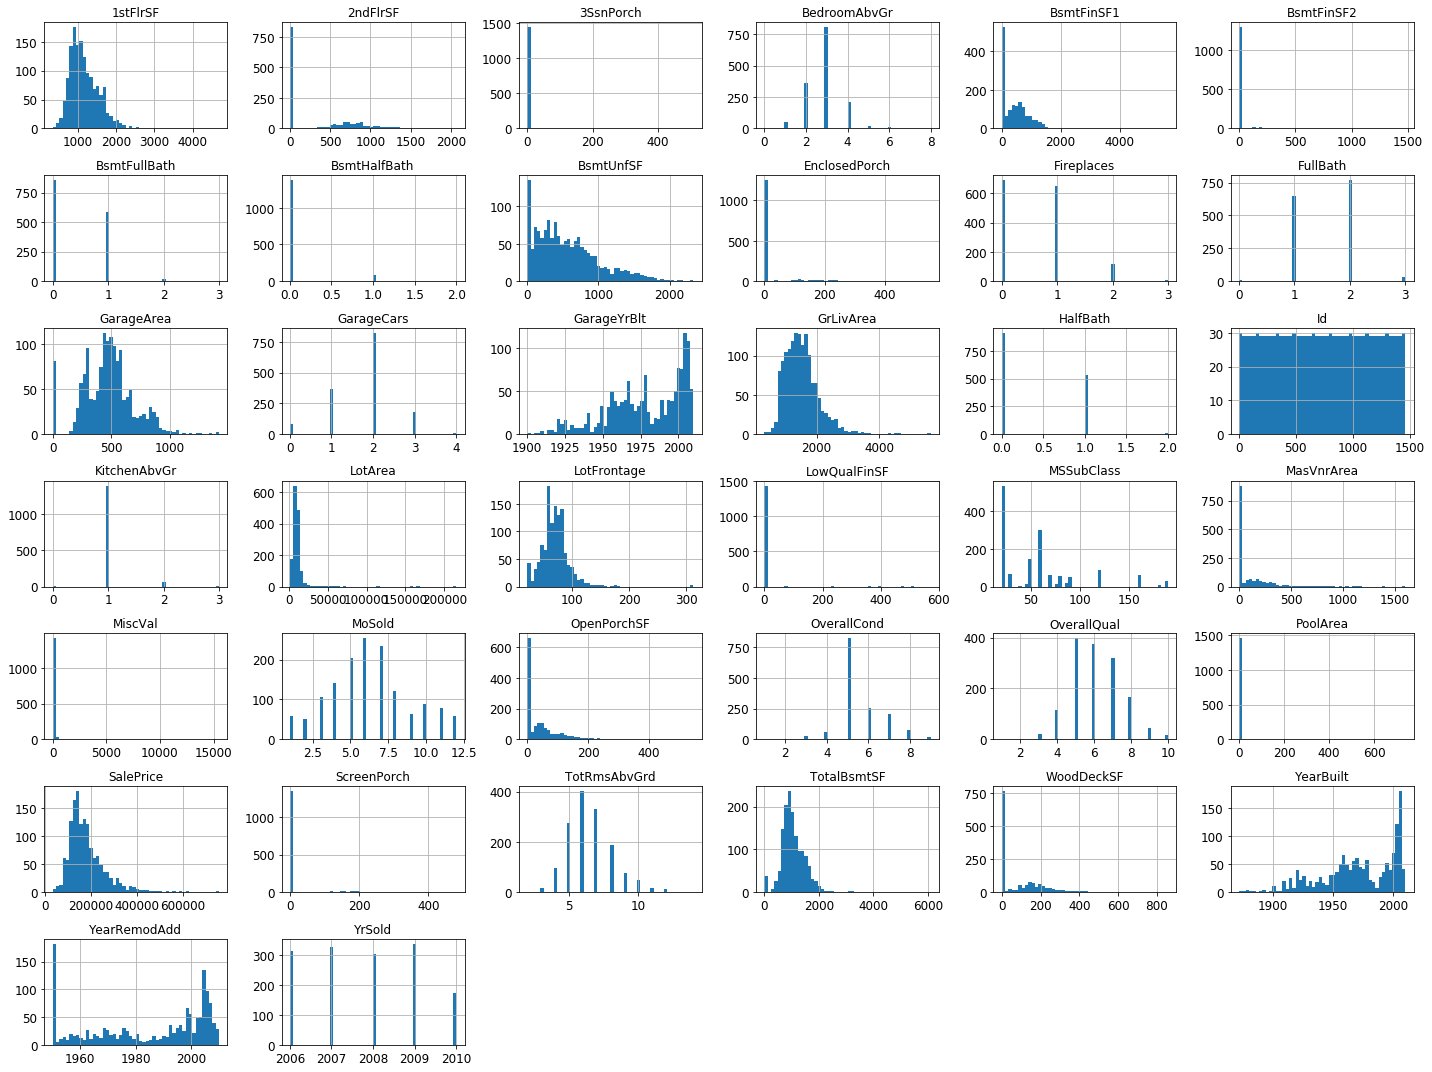

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [26]:
# to make this notebook's output identical at every run
np.random.seed(42)

## split the training set and the test set into 2 batch with the hash id

In [28]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [29]:
train_set, test_set = split_train_test_by_id(dataset, 0.2, "Id")

In [35]:
print(train_set.shape)
train_set.head()

(1179, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000


In [36]:
print(test_set.shape)
test_set.head()

(281, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
10,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000


In [37]:
## visualize the data

In [38]:
dataset = train_set.copy()

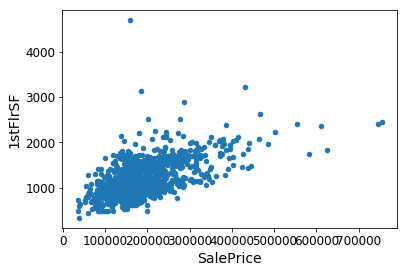

In [41]:
dataset.plot(kind="scatter", x="SalePrice", y="1stFlrSF")

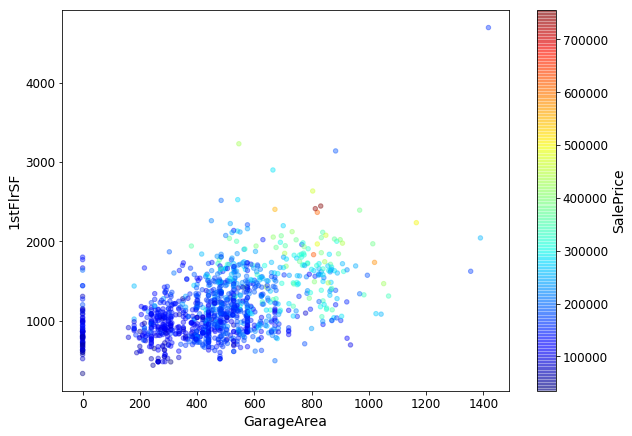

In [45]:
dataset.plot(kind="scatter", x="GarageArea", y="1stFlrSF", alpha=0.4, figsize=(10,7),
    c="SalePrice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [46]:
## Correlation matrix

In [47]:
corr_matrix = dataset.corr()

In [49]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.783971
GrLivArea        0.702090
GarageCars       0.638651
TotalBsmtSF      0.617705
GarageArea       0.614799
1stFlrSF         0.612494
FullBath         0.561970
YearBuilt        0.526432
TotRmsAbvGrd     0.522717
YearRemodAdd     0.497060
Fireplaces       0.483097
GarageYrBlt      0.481248
MasVnrArea       0.475586
BsmtFinSF1       0.401749
LotFrontage      0.374697
WoodDeckSF       0.318730
2ndFlrSF         0.305870
OpenPorchSF      0.303105
HalfBath         0.270705
LotArea          0.249049
BsmtFullBath     0.232294
BsmtUnfSF        0.220242
BedroomAbvGr     0.185894
PoolArea         0.111199
ScreenPorch      0.086395
3SsnPorch        0.044246
MoSold           0.031003
BsmtHalfBath    -0.006606
MiscVal         -0.012022
YrSold          -0.021519
BsmtFinSF2      -0.028403
Id              -0.028521
LowQualFinSF    -0.052392
OverallCond     -0.079830
MSSubClass      -0.104112
EnclosedPorch   -0.127390
KitchenAbvGr    -0.136064
Name: SalePr

Saving figure scatter_matrix_plot


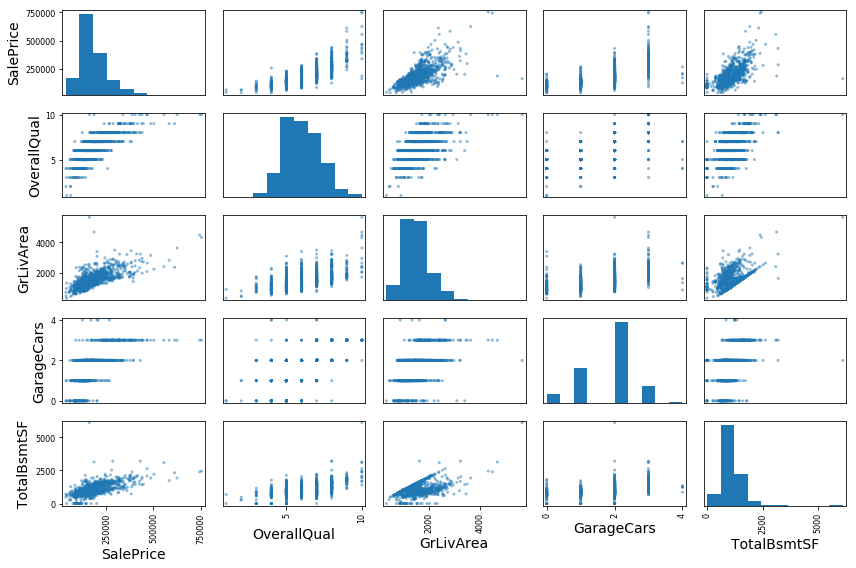

In [50]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea",
              "GarageCars", "TotalBsmtSF"]
scatter_matrix(dataset[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

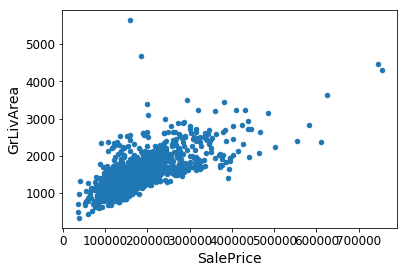

In [51]:
dataset.plot(kind="scatter", x="SalePrice", y="GrLivArea")

# Prepared the data

In [78]:
dataset = train_set.drop("SalePrice", axis=1)
dataset_label = train_set["SalePrice"].copy()

In [79]:
attributes = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "GarageArea", "1stFlrSF", "FullBath", "YearBuilt",
"TotRmsAbvGrd", "YearRemodAdd", "Fireplaces", "GarageYrBlt", "MasVnrArea", "BsmtFinSF1", "LotFrontage",
"WoodDeckSF", "2ndFlrSF", "OpenPorchSF", "HalfBath", "LotArea", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr", "PoolArea"]

dataset = train_set[attributes].copy()

In [80]:
dataset.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,...,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,PoolArea
0,7,1710,2,856,548,856,2,2003,8,2003,...,65.0,0,854,61,1,8450,1,150,3,0
1,6,1262,2,1262,460,1262,2,1976,6,1976,...,80.0,298,0,0,0,9600,0,284,3,0
2,7,1786,2,920,608,920,2,2001,6,2002,...,68.0,0,866,42,1,11250,1,434,3,0
5,5,1362,2,796,480,796,1,1993,5,1995,...,85.0,40,566,30,1,14115,1,64,1,0
6,8,1694,2,1686,636,1694,2,2004,7,2005,...,75.0,255,0,57,0,10084,1,317,3,0


## remove the missing data

In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 0 to 1459
Data columns (total 24 columns):
OverallQual     1179 non-null int64
GrLivArea       1179 non-null int64
GarageCars      1179 non-null int64
TotalBsmtSF     1179 non-null int64
GarageArea      1179 non-null int64
1stFlrSF        1179 non-null int64
FullBath        1179 non-null int64
YearBuilt       1179 non-null int64
TotRmsAbvGrd    1179 non-null int64
YearRemodAdd    1179 non-null int64
Fireplaces      1179 non-null int64
GarageYrBlt     1108 non-null float64
MasVnrArea      1172 non-null float64
BsmtFinSF1      1179 non-null int64
LotFrontage     961 non-null float64
WoodDeckSF      1179 non-null int64
2ndFlrSF        1179 non-null int64
OpenPorchSF     1179 non-null int64
HalfBath        1179 non-null int64
LotArea         1179 non-null int64
BsmtFullBath    1179 non-null int64
BsmtUnfSF       1179 non-null int64
BedroomAbvGr    1179 non-null int64
PoolArea        1179 non-null int64
dtypes: float64(3), int6

In [82]:
dataset[dataset.isnull().any(axis=1)]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,...,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,PoolArea
7,7,2090,2,1107,484,1107,2,1973,7,1973,...,NaN,235,983,204,1,10382,1,216,3,0
12,5,912,1,912,352,912,1,1962,4,1962,...,NaN,140,0,0,0,12968,1,175,2,0
14,6,1253,1,1253,352,1253,1,1960,5,1960,...,NaN,0,0,213,1,10920,1,520,2,0
16,6,1004,2,1004,480,1004,1,1970,5,1970,...,NaN,0,0,0,0,11241,1,426,2,0
24,5,1060,1,1060,270,1060,1,1968,6,2001,...,NaN,406,0,90,0,8246,1,204,3,0
31,5,1228,1,1228,271,1228,1,1966,6,2006,...,NaN,0,0,65,1,8544,0,1228,3,0
39,4,1152,0,0,0,1152,2,1955,6,1955,...,65.0,0,0,0,0,6040,0,0,2,0
42,5,884,2,840,504,884,1,1983,5,1983,...,NaN,240,0,0,0,9180,1,0,2,0
43,5,938,1,938,308,938,1,1975,5,1980,...,NaN,145,0,0,0,9200,1,167,3,0
48,4,1452,0,736,0,736,2,1920,8,2008,...,33.0,0,716,0,0,4456,0,736,2,0


In [83]:
dataset = dataset.drop("LotFrontage", axis=1)

In [89]:
dataset.isnull().any(axis=0)

OverallQual     False
GrLivArea       False
GarageCars      False
TotalBsmtSF     False
GarageArea      False
1stFlrSF        False
FullBath        False
YearBuilt       False
TotRmsAbvGrd    False
YearRemodAdd    False
Fireplaces      False
GarageYrBlt      True
MasVnrArea       True
BsmtFinSF1      False
WoodDeckSF      False
2ndFlrSF        False
OpenPorchSF     False
HalfBath        False
LotArea         False
BsmtFullBath    False
BsmtUnfSF       False
BedroomAbvGr    False
PoolArea        False
dtype: bool

In [93]:
dataset["GarageYrBlt"].isnull().sum()

71

In [97]:
dataset["GarageYrBlt"]

0       2003.0
1       1976.0
2       2001.0
5       1993.0
6       2004.0
7       1973.0
8       1931.0
9       1939.0
11      2005.0
12      1962.0
13      2006.0
14      1960.0
15      1991.0
16      1970.0
17      1967.0
18      2004.0
20      2005.0
21      1930.0
23      1976.0
24      1968.0
25      2007.0
26      2005.0
27      2008.0
28      1957.0
29      1920.0
30      1920.0
31      1966.0
32      2007.0
35      2004.0
36      1995.0
         ...  
1423    1966.0
1424    1970.0
1425    1960.0
1427    1962.0
1428    1940.0
1430    2005.0
1431    1976.0
1432    1928.0
1433    2000.0
1434    1977.0
1435    1962.0
1436    1974.0
1437    2008.0
1438    1957.0
1440    1993.0
1441    2004.0
1444    2004.0
1445    1990.0
1447    1995.0
1448    1950.0
1449       NaN
1450       NaN
1451    2008.0
1452    2005.0
1453       NaN
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1179, dtype: float64

In [95]:
dataset["MasVnrArea"].isnull().sum()

7

In [96]:
dataset["MasVnrArea"]

0       196.0
1         0.0
2       162.0
5         0.0
6       186.0
7       240.0
8         0.0
9         0.0
11      286.0
12        0.0
13      306.0
14      212.0
15        0.0
16      180.0
17        0.0
18        0.0
20      380.0
21        0.0
23        0.0
24        0.0
25      640.0
26        0.0
27      200.0
28        0.0
29        0.0
30        0.0
31        0.0
32        0.0
35      132.0
36        0.0
        ...  
1423      0.0
1424      0.0
1425    243.0
1427      0.0
1428    294.0
1430      0.0
1431      0.0
1432      0.0
1433    318.0
1434      0.0
1435    237.0
1436      0.0
1437    426.0
1438      0.0
1440      0.0
1441    147.0
1444    106.0
1445      0.0
1447    438.0
1448      0.0
1449      0.0
1450      0.0
1451    194.0
1452     80.0
1453      0.0
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1179, dtype: float64

In [98]:
median = dataset["GarageYrBlt"].median()
dataset["GarageYrBlt"].fillna(median, inplace=True)

In [99]:
dataset["MasVnrArea"].fillna(0, inplace=True)

In [100]:
dataset[dataset.isnull().any(axis=1)]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,FullBath,YearBuilt,TotRmsAbvGrd,YearRemodAdd,...,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr,PoolArea


## scikit transformer

In [ ]:
dataset = train_set.copy()

In [153]:
attributes = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "GarageArea", "1stFlrSF", "FullBath", "YearBuilt",
                "TotRmsAbvGrd", "YearRemodAdd", "Fireplaces", "GarageYrBlt", "MasVnrArea", "BsmtFinSF1",
                "WoodDeckSF", "2ndFlrSF", "OpenPorchSF", "HalfBath", "LotArea", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr", "PoolArea"]
attr_idx = [dataset.columns.get_loc(c) for c in dataset.columns if c in attributes]
missing_idx = dataset.columns.get_loc("MasVnrArea")

In [154]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class selectColumns(BaseEstimator, TransformerMixin):
    def __init__(self, attr_idx, missing_idx): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        X[np.isnan(X[:, missing_idx]), missing_idx] = 0
        return X[:, attr_idx].copy()

attr_adder = selectColumns(attr_idx, missing_idx)
extra_attribs = attr_adder.transform(dataset.values)

In [155]:
extra_attribs

array([[7.000e+00, 1.710e+03, 2.000e+00, ..., 1.500e+02, 3.000e+00,
        0.000e+00],
       [6.000e+00, 1.262e+03, 2.000e+00, ..., 2.840e+02, 3.000e+00,
        0.000e+00],
       [7.000e+00, 1.786e+03, 2.000e+00, ..., 4.340e+02, 3.000e+00,
        0.000e+00],
       ...,
       [7.000e+00, 2.340e+03, 1.000e+00, ..., 8.770e+02, 4.000e+00,
        0.000e+00],
       [5.000e+00, 1.078e+03, 1.000e+00, ..., 0.000e+00, 2.000e+00,
        0.000e+00],
       [5.000e+00, 1.256e+03, 1.000e+00, ..., 1.360e+02, 3.000e+00,
        0.000e+00]])

In [156]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

full_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('sel_col', selectColumns(attr_idx, missing_idx)),
        ('std_scaler', StandardScaler()),
    ])

dataset_tr = full_pipeline.fit_transform(dataset)

In [157]:
dataset_tr

array([[ 0.66211159,  0.36297196,  0.31715879, ..., -0.93751508,
         0.15456797, -0.05760786],
       [-0.06069356, -0.48101346,  0.31715879, ..., -0.63738548,
         0.15456797, -0.05760786],
       [ 0.66211159,  0.50614806,  0.31715879, ..., -0.30141951,
         0.15456797, -0.05760786],
       ...,
       [ 0.66211159,  1.54982646, -1.00883486, ...,  0.69079999,
         1.37762598, -0.05760786],
       [-0.78349871, -0.82765033, -1.00883486, ..., -1.27348105,
        -1.06849003, -0.05760786],
       [-0.78349871, -0.49231684, -1.00883486, ..., -0.96887191,
         0.15456797, -0.05760786]])

## Select and train a model 

In [158]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(dataset_tr, dataset_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [159]:
# let's try the full preprocessing pipeline on a few training instances
some_data = dataset.iloc[:5]
some_labels = dataset_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [222230.70903623 175856.57466343 224121.93789506 164879.608839
 272698.47192165]
Labels: [208500, 181500, 223500, 143000, 307000]


In [226]:
from sklearn.metrics import mean_squared_error

dataset_predictions = lin_reg.predict(dataset_tr)
lin_mse = mean_squared_error(dataset_label, dataset_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

36579.436088828814

In [161]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(dataset_label, dataset_predictions)
lin_mae

22385.051042615265

## Predict and save CSV

In [209]:
predictset_tr = predictset[attributes].copy()
predictset_tr = full_pipeline.fit_transform(predictset_tr)

In [210]:
predictset_res = lin_reg.predict(predictset_tr)

In [232]:
import numpy as np

PATH = "predict"

def save_csv(name, path=PATH):
    csv_path = os.path.join(path, name + "_result.csv")
    pd.DataFrame(data={'Id': predictset["Id"], 'SalePrice': predictset_res}).to_csv(csv_path, index=False)

In [236]:
def predict_save(name):
    predictset_tr = predictset[attributes].copy()
    predictset_tr = full_pipeline.fit_transform(predictset_tr)
    predictset_res = algo.predict(predictset_tr)
    save_csv(name)
    
predict_save("lin", lin_reg)

## Fit the model

In [217]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(dataset_tr, dataset_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [219]:
housing_predictions = tree_reg.predict(dataset_tr)
tree_mse = mean_squared_error(dataset_label, dataset_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

36579.436088828814

In [220]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, dataset_tr, dataset_label,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [221]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [41077.5879672  43837.01481519 39359.67491243 49609.63607728
 41526.21688153 36629.20709729 31518.99279315 39772.66318706
 56951.9878977  37643.72745266]
Mean: 41792.670908149055
Standard deviation: 6746.072727580362


In [222]:
lin_scores = cross_val_score(lin_reg, dataset_tr, dataset_label,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [29660.56029537 30871.08779459 26826.10633828 45492.71321674
 43469.98569986 32733.87519324 33219.64221401 27264.72733081
 73223.08239274 29048.34488882]
Mean: 37181.01253644565
Standard deviation: 13458.102639052639


In [223]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(dataset_tr, dataset_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [225]:
dataset_predictions = forest_reg.predict(dataset_tr)
forest_mse = mean_squared_error(dataset_label, dataset_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

12509.751107507567

In [244]:
def predict_save(name, algo):
    predictset_tr = predictset[attributes].copy()
    predictset_tr = full_pipeline.fit_transform(predictset_tr)
    predictset_res = algo.predict(predictset_tr)
    save_csv(name)
    
predict_save("forest", forest_reg)

 - classement 3109 on Kaggle

## grid search

In [248]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 60, 120], 'max_features': [2, 4, 6, 8, 10, 12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(dataset_tr, dataset_label) 

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 60, 120], 'max_features': [2, 4, 6, 8, 10, 12]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [249]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 120}

In [252]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [60, 120, 240, 480], 'max_features': [8, 10, 12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(dataset_tr, dataset_label) 

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [60, 120, 240, 480], 'max_features': [8, 10, 12]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [253]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 240}

In [255]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=100, high=500),
        'max_features': randint(low=1, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(dataset_tr, dataset_label) 

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f13da24d668>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f13da24dbe0>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [256]:
rnd_search.best_params_

{'max_features': 8, 'n_estimators': 230}

## feature importance

In [263]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, list(dataset.columns.values)), reverse=True)

[(0.2462955106077333, 'OverallQual'),
 (0.13428410464959104, 'GrLivArea'),
 (0.1267092339600562, 'GarageCars'),
 (0.08964511399315506, 'TotalBsmtSF'),
 (0.07577568712321833, 'YearBuilt'),
 (0.05125075902780028, '1stFlrSF'),
 (0.04621359627891394, 'GarageArea'),
 (0.03894758118407564, '2ndFlrSF'),
 (0.03240890355556585, 'BsmtFinSF1'),
 (0.021373911322606732, 'LotArea'),
 (0.018243949512157208, 'YearRemodAdd'),
 (0.018207126525964068, 'GarageYrBlt'),
 (0.016952724826357825, 'MasVnrArea'),
 (0.016086598298405703, 'FullBath'),
 (0.01571337379440162, 'Fireplaces'),
 (0.011348399645919233, 'TotRmsAbvGrd'),
 (0.010788304965071875, 'BsmtUnfSF'),
 (0.009096055225668895, 'OpenPorchSF'),
 (0.006388100988931913, 'WoodDeckSF'),
 (0.00552884206223571, 'BedroomAbvGr'),
 (0.0036189104286012464, 'HalfBath'),
 (0.003450735862432614, 'BsmtFullBath'),
 (0.0016724761611357022, 'PoolArea')]

In [269]:
final_model = rnd_search

final_predictions = final_model.predict(dataset_tr)

final_mse = mean_squared_error(dataset_label, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

11497.727854027036

In [273]:
final_predictset_res = final_model.predict(predictset_tr)

In [275]:
def predict_save(name, algo):
    predictset_tr = predictset[attributes].copy()
    predictset_tr = full_pipeline.fit_transform(predictset_tr)
    predictset_res = algo.predict(predictset_tr)
    save_csv(name)
    
predict_save("final", final_model)

 - Classement 3105 on Kaggle
 
 only 4 places ahead it's a very few with the grid search therefore verify the useful of it
 
 as far as concerned improvement of leaderbord :
  - use more features like the none linear spec
  - aggregate both features for more precision, or phenomena
  - test other algorithm, but at first RF is the more powerfull